In [75]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import sklearn.preprocessing as prep

%matplotlib inline

# 二値分類問題
分類問題には交差エントロピーを使う事が多い。二値分類にはbinary_crossentropyを使うが、mean_squared_error(平均二乗誤差)も使える。

In [3]:
from tensorflow.keras import datasets, models, layers, optimizers, activations, losses, utils
from sklearn.feature_extraction import DictVectorizer
import collections

In [5]:
(train_data, train_label), (test_data, test_label) = datasets.imdb.load_data(num_words=10000)
train_data_raw = list(train_data)
test_data_raw = list(test_data)

17465344/17464789 [==============================] - 2s 0us/step


In [6]:
dv = DictVectorizer(dtype=np.int)
train_data = dv.fit_transform([collections.Counter(item) for item in train_data_raw])
test_data = dv.transform([collections.Counter(item) for item in test_data_raw])

In [7]:
print(train_data.shape, train_label.shape)

(25000, 9998) (25000,)


In [10]:
mod = models.Sequential()
mod.add(layers.Dense(16, activations.relu, input_shape=(len(dv.feature_names_),)))
mod.add(layers.Dense(16, activations.relu))
mod.add(layers.Dense(1, activations.sigmoid))
mod.compile(optimizers.RMSprop(), losses.binary_crossentropy, metrics=["acc"])

In [130]:
res = mod.fit(train_data, train_label, batch_size=512, epochs=20, validation_data=(test_data, test_label))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 91us/sample - loss: 0.4919 - acc: 0.7952 - val_loss: 0.3605 - val_acc: 0.8762
Epoch 2/20
25000/25000 [==============================] - 2s 75us/sample - loss: 0.2961 - acc: 0.8964 - val_loss: 0.3058 - val_acc: 0.8852
Epoch 3/20
25000/25000 [==============================] - 2s 75us/sample - loss: 0.2334 - acc: 0.9182 - val_loss: 0.3234 - val_acc: 0.8763
Epoch 4/20
25000/25000 [==============================] - 2s 73us/sample - loss: 0.1961 - acc: 0.9316 - val_loss: 0.2891 - val_acc: 0.8878
Epoch 5/20
25000/25000 [==============================] - 2s 69us/sample - loss: 0.1675 - acc: 0.9406 - val_loss: 0.3012 - val_acc: 0.8844
Epoch 6/20
25000/25000 [==============================] - 2s 69us/sample - loss: 0.1513 - acc: 0.9465 - val_loss: 0.3136 - val_acc: 0.8803
Epoch 7/20
25000/25000 [==============================] - 2s 77us/sample - loss: 0.1294 - acc: 0.9551 - val_loss: 0.

In [138]:
res.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

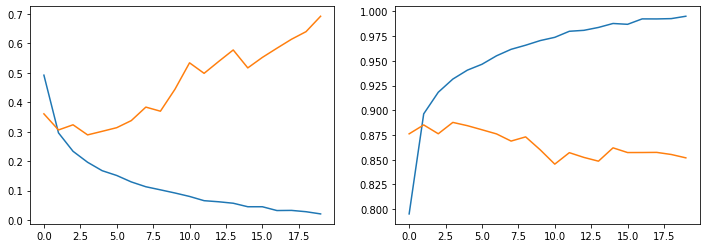

In [145]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(res.history["loss"])
plt.plot(res.history["val_loss"])

plt.subplot(1, 2, 2)
plt.plot(res.history["acc"])
plt.plot(res.history["val_acc"])

レイヤー数を変えてみる。

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 71us/sample - loss: 0.4873 - acc: 0.7931 - val_loss: 0.3669 - val_acc: 0.8729
Epoch 2/20
25000/25000 [==============================] - 2s 64us/sample - loss: 0.2979 - acc: 0.9003 - val_loss: 0.3125 - val_acc: 0.8824
Epoch 3/20
25000/25000 [==============================] - 2s 63us/sample - loss: 0.2366 - acc: 0.9196 - val_loss: 0.2895 - val_acc: 0.8888
Epoch 4/20
25000/25000 [==============================] - 2s 63us/sample - loss: 0.2016 - acc: 0.9315 - val_loss: 0.2864 - val_acc: 0.8893
Epoch 5/20
25000/25000 [==============================] - 2s 63us/sample - loss: 0.1752 - acc: 0.9412 - val_loss: 0.2903 - val_acc: 0.8864
Epoch 6/20
25000/25000 [==============================] - 2s 63us/sample - loss: 0.1577 - acc: 0.9460 - val_loss: 0.3106 - val_acc: 0.8815
Epoch 7/20
25000/25000 [==============================] - 2s 64us/sample - loss: 0.1424 - acc: 0.9521 - val_loss: 0.

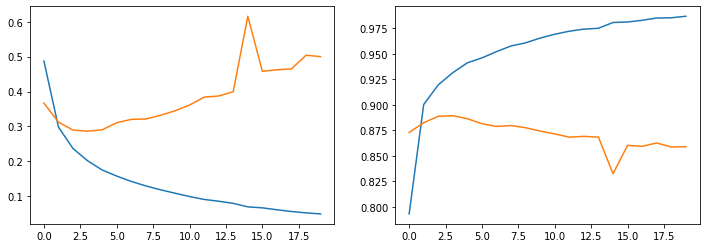

In [18]:
mod = models.Sequential()
mod.add(layers.Dense(16, activations.relu, input_shape=(len(dv.feature_names_),)))
mod.add(layers.Dense(1, activations.sigmoid))
mod.compile(optimizers.RMSprop(), losses.binary_crossentropy, metrics=["acc"])
res = mod.fit(train_data, train_label, batch_size=512, epochs=20, validation_data=(test_data, test_label))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(res.history["loss"])
plt.plot(res.history["val_loss"])

plt.subplot(1, 2, 2)
plt.plot(res.history["acc"])
plt.plot(res.history["val_acc"])

# 多クラス分類問題

In [289]:
num_words = 10000
(train_data_raw, train_label_raw), (test_data_raw, test_label_raw) = datasets.reuters.load_data(num_words=num_words)

In [295]:
train_data = np.zeros((train_data_raw.size, num_words), dtype=np.float)
test_data = np.zeros((test_data_raw.size, num_words), dtype=np.float)

for i, item in enumerate(train_data_raw):
    train_data[i, item] = 1
for i, item in enumerate(test_data_raw):
    test_data[i, item] = 1
    
train_label = utils.to_categorical(train_label_raw)
test_label = utils.to_categorical(test_label_raw)

print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(8982, 10000)
(2246, 10000)
(8982, 46)
(2246, 46)


In [338]:
# dv = DictVectorizer(dtype=np.int)
# train_data = dv.fit_transform([collections.Counter(item) for item in train_data_raw])
# test_data = dv.transform([collections.Counter(item) for item in test_data_raw])

# train_data = (train_data.toarray() > 0).astype(np.float)
# test_data = (test_data.toarray() > 0).astype(np.float)

# train_label = utils.to_categorical(train_label_raw)
# test_label = utils.to_categorical(test_label_raw)

In [376]:
mod = models.Sequential()
mod.add(layers.Dense(64, activations.relu, input_shape=(train_data.shape[1],)))
mod.add(layers.Dense(64, activations.relu))
mod.add(layers.Dense(46, activations.softmax))
mod.compile("rmsprop", loss="categorical_crossentropy", metrics=["acc"])
res = mod.fit(train_data, train_label, batch_size=512, epochs=20, validation_data=(test_data, test_label))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 2s 270us/sample - loss: 2.4957 - acc: 0.5404 - val_loss: 1.6701 - val_acc: 0.6509
Epoch 2/20
8982/8982 [==============================] - 0s 50us/sample - loss: 1.3524 - acc: 0.7104 - val_loss: 1.3070 - val_acc: 0.7150
Epoch 3/20
8982/8982 [==============================] - 0s 49us/sample - loss: 1.0079 - acc: 0.7862 - val_loss: 1.1470 - val_acc: 0.7524
Epoch 4/20
8982/8982 [==============================] - 0s 51us/sample - loss: 0.7929 - acc: 0.8347 - val_loss: 1.0472 - val_acc: 0.7720
Epoch 5/20
8982/8982 [==============================] - 0s 50us/sample - loss: 0.6275 - acc: 0.8690 - val_loss: 0.9769 - val_acc: 0.7814
Epoch 6/20
8982/8982 [==============================] - 0s 51us/sample - loss: 0.4976 - acc: 0.8953 - val_loss: 0.9465 - val_acc: 0.7854
Epoch 7/20
8982/8982 [==============================] - 0s 50us/sample - loss: 0.4014 - acc: 0.9148 - val_loss: 0.9325 - val_acc:

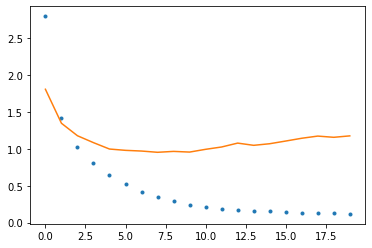

In [375]:
plt.plot(res.history["loss"], "o", ms=3)
plt.plot(res.history["val_loss"])

OneHotエンコードせずに訓練する事も可能。その場合には損失関数にスパース版を使う。数学的には不通の交差エントロピーと同一になる。

In [393]:
mod = models.Sequential()
mod.add(layers.Dense(64, activations.relu, input_shape=(train_data.shape[1],)))
mod.add(layers.Dense(64, activations.relu))
mod.add(layers.Dense(46, activations.softmax))
mod.compile("rmsprop", loss="sparse_categorical_crossentropy", metrics=["acc"])
res = mod.fit(train_data, train_label_raw, batch_size=512, epochs=20, validation_data=(test_data, test_label_raw))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 3s 300us/sample - loss: 2.6243 - acc: 0.5156 - val_loss: 1.7784 - val_acc: 0.6616
Epoch 2/20
8982/8982 [==============================] - 1s 66us/sample - loss: 1.4121 - acc: 0.7081 - val_loss: 1.3331 - val_acc: 0.7004
Epoch 3/20
8982/8982 [==============================] - 1s 66us/sample - loss: 1.0368 - acc: 0.7741 - val_loss: 1.1604 - val_acc: 0.7400
Epoch 4/20
8982/8982 [==============================] - 1s 66us/sample - loss: 0.8177 - acc: 0.8265 - val_loss: 1.0777 - val_acc: 0.7551
Epoch 5/20
8982/8982 [==============================] - 1s 65us/sample - loss: 0.6494 - acc: 0.8644 - val_loss: 0.9971 - val_acc: 0.7854
Epoch 6/20
8982/8982 [==============================] - 1s 64us/sample - loss: 0.5163 - acc: 0.8968 - val_loss: 0.9482 - val_acc: 0.7867
Epoch 7/20
8982/8982 [==============================] - 1s 66us/sample - loss: 0.4178 - acc: 0.9153 - val_loss: 0.9252 - val_acc:

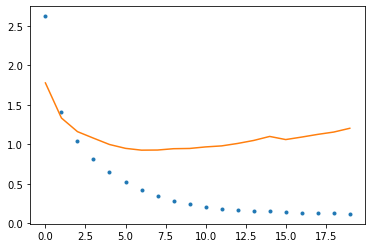

In [399]:
plt.plot(res.history["loss"], "o", ms=3)
plt.plot(res.history["val_loss"])

# 回帰問題
損失関数には平均二乗誤差、評価指標に平均絶対誤差を使う。

In [397]:
(train_data_raw, train_label_raw), (test_data_raw, test_label_raw) = datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [437]:
ss = prep.StandardScaler()
train_data = ss.fit_transform(train_data_raw)
test_data = ss.transform(test_data_raw)

train_label = train_label_raw
test_label = test_label_raw

In [408]:
mod = models.Sequential()

In [439]:
print(train_data.shape)
print(train_label.shape)

(404, 13)
(404,)


Train on 404 samples, validate on 102 samples
Epoch 1/20
404/404 [==============================] - 5s 12ms/sample - loss: 609.6815 - mean_absolute_error: 22.9140 - val_loss: 634.6987 - val_mean_absolute_error: 23.4831
Epoch 2/20
404/404 [==============================] - 0s 334us/sample - loss: 603.2080 - mean_absolute_error: 22.7722 - val_loss: 630.4352 - val_mean_absolute_error: 23.3921
Epoch 3/20
404/404 [==============================] - 0s 292us/sample - loss: 599.4363 - mean_absolute_error: 22.6893 - val_loss: 627.4000 - val_mean_absolute_error: 23.3272
Epoch 4/20
404/404 [==============================] - 0s 307us/sample - loss: 596.6451 - mean_absolute_error: 22.6282 - val_loss: 624.8848 - val_mean_absolute_error: 23.2732
Epoch 5/20
404/404 [==============================] - 0s 334us/sample - loss: 594.3597 - mean_absolute_error: 22.5770 - val_loss: 622.8826 - val_mean_absolute_error: 23.2301
Epoch 6/20
404/404 [==============================] - 0s 292us/sample - loss: 592.483

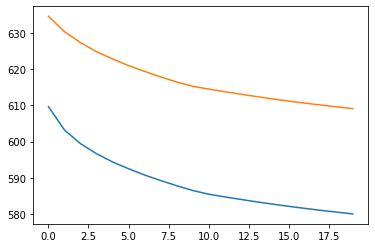

In [464]:
mod.add(layers.Dense(8, "relu", input_shape=(train_data.shape[1],)))
mod.add(layers.Dense(8, "relu"))
mod.add(layers.Dense(1))
mod.compile("RMSProp", loss="mse", metrics=["mae"])
res = mod.fit(train_data, train_label, batch_size=128, epochs=20, validation_data=(test_data, test_label))

plt.plot(res.history["loss"])
plt.plot(res.history["val_loss"])

In [451]:
res.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

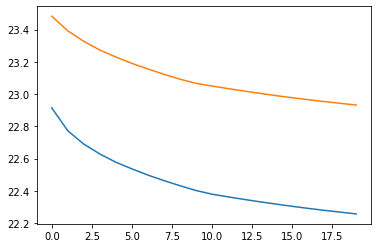

In [465]:
plt.plot(res.history["mean_absolute_error"])
plt.plot(res.history["val_mean_absolute_error"])